In [1]:
#pip install yfinance html5lib lxml beautifulsoup4 pandas

In [11]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt


# Question 1: Use yfinance to Extract Stock Data

Reset the index, save, and display the first five rows of the tesla_data dataframe using the head function. Upload a screenshot of the results and code from the beginning of Question 1 to the results below.

In [3]:
# Download Tesla stock data
tesla_data = yf.Ticker("TSLA").history(period="max")

# Reset index so Date becomes a column
tesla_data.reset_index(inplace=True)

# Display first five rows
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


# Question 2: Use Webscraping to Extract Tesla Revenue Data

Display the last five rows of the tesla_revenue dataframe using the tail function. Upload a screenshot of the results.

In [ ]:
#Get the page
tesla_url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
tesla_headers = {"User-Agent": "Mozilla/5.0"}
tesla_html = requests.get(tesla_url, headers=tesla_headers).text

#parse HTML
tesla_soup = BeautifulSoup(tesla_html, "lxml")

# Step Find *all* tables and pick the one that contains "Quarterly Revenue"
tesla_tables = tesla_soup.find_all("table")

tesla_target_table = None
for table in tesla_tables:
    if "Quarterly Revenue" in table.get_text():
        tesla_target_table = table
        break

#Convert that table to a DataFrame
if tesla_target_table is not None:
    tesla_df = pd.read_html(str(tesla_target_table))[0]
else:
    raise Exception("Couldn't find Tesla Quarterly Revenue table!")

#Clean up the data
tesla_df.columns = ["Date", "Revenue (Millions of US $)"]
tesla_df["Date"] = pd.to_datetime(tesla_df["Date"])
tesla_df["Revenue_USD_Millions"] = (tesla_df["Revenue (Millions of US $)"])
tesla_df = tesla_df[["Date", "Revenue_USD_Millions"]].sort_values("Date").reset_index(drop=True)

tesla_df.tail()

/var/folders/n3/f7qpktfx6wv956bxwbg3rcdh0000gn/T/ipykernel_4042/850559871.py:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tesla_df = pd.read_html(str(tesla_target_table))[0]


,Date,Revenue_USD_Millions
55,2024-09-30,"$25,182"
56,2024-12-31,"$25,707"
57,2025-03-31,"$19,335"
58,2025-06-30,"$22,496"
59,2025-09-30,"$28,095"


# Question 3: Use yfinance to Extract Stock Data

Reset the index, save, and display the first five rows of the gme_data dataframe using the head function. Upload a screenshot of the results and code from the beginning of Question 1 to the results below.

In [ ]:


# Download GME stock data
gme_data = yf.Ticker("GME").history(period="max")

# Reset index so that "Date" becomes a normal column
gme_data.reset_index(inplace=True)

# Display the first 5 rows
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712708,1.716074,1.670627,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


# Question 4: Use Webscraping to Extract GME Revenue Data

Display the last five rows of the gme_revenue dataframe using the tail function. Upload a screenshot of the results.

In [10]:
#Get the page
url_GME = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
headers_GME = {"User-Agent": "Mozilla/5.0"}
html_GME = requests.get(url_GME, headers=headers_GME).text

#Parse HTML
soup_GME = BeautifulSoup(html_GME, "lxml")

#Find *all* tables and pick the one that contains "Quarterly Revenue"
tables_GME = soup_GME.find_all("table")

target_table_GME = None
for table in tables_GME:
    if "Quarterly Revenue" in table.get_text():
        target_table_GME = table
        break

#Convert that table to a DataFrame
if target_table_GME is not None:
    GME_df = pd.read_html(str(target_table_GME))[0]
else:
    raise Exception("Couldn't find Tesla Quarterly Revenue table!")

#Clean up the data
GME_df.columns = ["Date", "Revenue (Millions of US $)"]
GME_df["Date"] = pd.to_datetime(GME_df["Date"])
GME_df["Revenue_USD_Millions"] = (GME_df["Revenue (Millions of US $)"])
GME_df = GME_df[["Date", "Revenue_USD_Millions"]].sort_values("Date").reset_index(drop=True)

GME_df.tail()

/var/folders/n3/f7qpktfx6wv956bxwbg3rcdh0000gn/T/ipykernel_4042/434849309.py:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  GME_df = pd.read_html(str(target_table_GME))[0]


,Date,Revenue_USD_Millions
55,2024-07-31,$798
56,2024-10-31,$860
57,2025-01-31,"$1,283"
58,2025-04-30,$732
59,2025-07-31,$972


# Question 5: Plot Tesla Stock Graph

Use the make_graph function to graph the Tesla Stock Data, also provide a title for the graph.

Upload a screenshot of your results.

In [12]:
# Download Tesla stock data
tesla_data = yf.Ticker("TSLA").history(period="max")

# Reset index so Date becomes a normal column
tesla_data.reset_index(inplace=True)

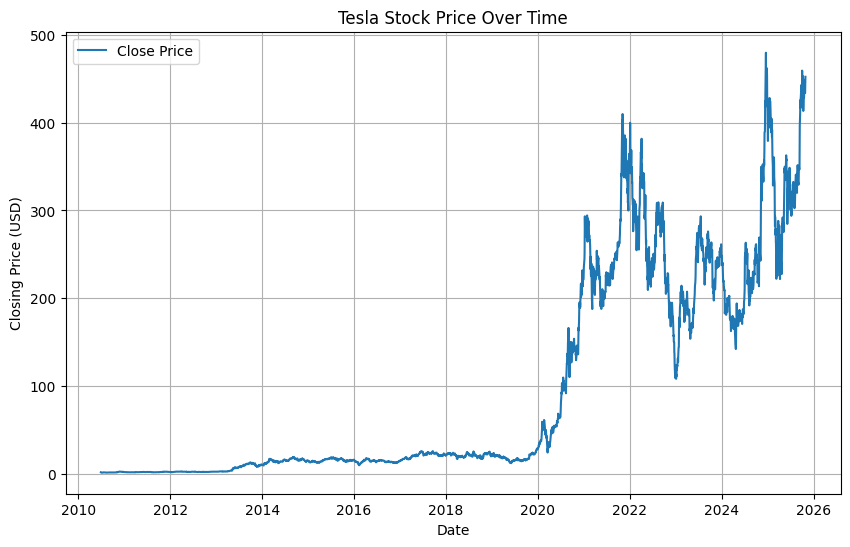

In [14]:
def make_graph(stock_data, title):
    plt.figure(figsize=(10,6))
    plt.plot(stock_data['Date'], stock_data['Close'], label='Close Price')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Closing Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()
    
make_graph(tesla_data, "Tesla Stock Price Over Time")

# Question 6: Plot GameStop Stock Graph

Use the make_graph function to graph the GameStop Stock Data, also provide a title for the graph.

Upload a screenshot of your results.

In [15]:
# Download GameStop stock data
gme_data = yf.Ticker("GME").history(period="max")

# Reset index so Date becomes a column
gme_data.reset_index(inplace=True)

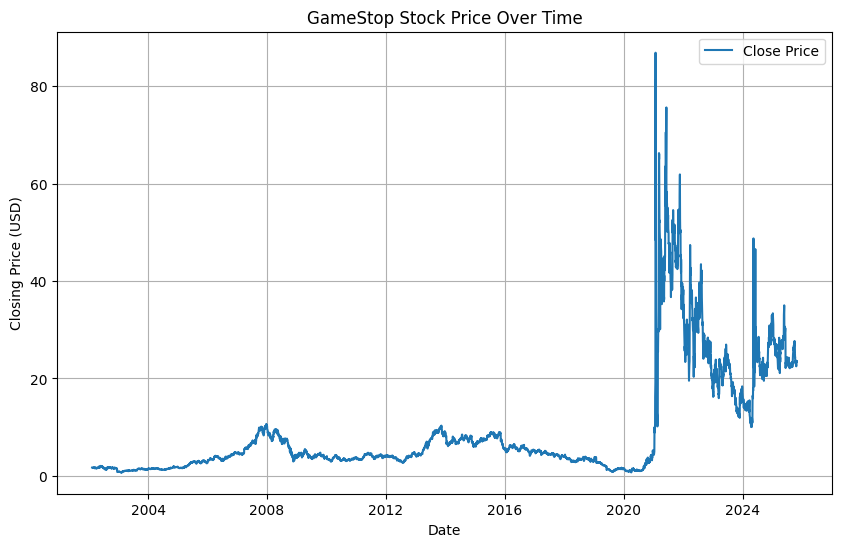

In [16]:
make_graph(gme_data, "GameStop Stock Price Over Time")